In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML

In [2]:
dataset = pd.read_csv("dataset/dataset_final.csv")
print("Number of rows in the dataset:", len(dataset))

pd.set_option('display.max_columns', None)
dataset.head(10)

Number of rows in the dataset: 52160


,Time,Driver,LapTime,LapNumber,Stint,Compound,TyreLife,FreshTyre,Team,RoundNumber,EventName,Session,EventYear,TimeWeather,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,FuelLevel
0,1863.689,VER,91.295,3.0,2.0,SOFT,3.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,1841.346,24.2,16.0,1017.5,False,28.7,352,0.6,2.0
1,3315.214,VER,90.503,8.0,4.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,3281.491,23.8,20.0,1017.7,False,27.8,342,0.5,2.0
2,4551.213,VER,89.897,11.0,5.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,4541.500,23.1,31.0,1017.7,False,26.9,338,1.3,2.0
3,5034.472,VER,89.708,14.0,6.0,SOFT,2.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,5021.569,23.0,33.0,1017.9,False,26.6,329,0.8,2.0
4,1926.785,PER,91.479,3.0,2.0,SOFT,3.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,1901.344,24.3,16.0,1017.5,False,28.7,333,0.4,2.0
5,3322.843,PER,90.746,8.0,4.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,3281.491,23.8,20.0,1017.7,False,27.8,342,0.5,2.0
6,4557.035,PER,90.131,11.0,5.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,4541.500,23.1,31.0,1017.7,False,26.9,338,1.3,2.0
7,5040.743,PER,89.846,14.0,6.0,SOFT,2.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,5021.569,23.0,33.0,1017.9,False,26.6,329,0.8,2.0
8,1899.739,LEC,91.094,5.0,2.0,SOFT,2.0,True,Ferrari,1,Bahrain Grand Prix,Qualifying,2023,1841.346,24.2,16.0,1017.5,False,28.7,352,0.6,2.0
9,3301.222,LEC,91.699,10.0,4.0,SOFT,7.0,False,Ferrari,1,Bahrain Grand Prix,Qualifying,2023,3281.491,23.8,20.0,1017.7,False,27.8,342,0.5,2.0


In [3]:
dataset.columns

Index(['Time', 'Driver', 'LapTime', 'LapNumber', 'Stint', 'Compound',
       'TyreLife', 'FreshTyre', 'Team', 'RoundNumber', 'EventName', 'Session',
       'EventYear', 'TimeWeather', 'AirTemp', 'Humidity', 'Pressure',
       'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed', 'FuelLevel'],
      dtype='object')

In [4]:
# Standardization of original data points (mean 0 and std dev 1)
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

# Destandardization of standardized data points
def destandardize(z, mean, std):
    return z * std + mean

# Manual one-hot encoding for categorical variables
def one_hot_encode(values):
    unique = sorted(set(values))
    one_hot = np.zeros((len(values), len(unique)))
    for i, val in enumerate(values):
        one_hot[i][unique.index(val)] = 1
    return one_hot

# Build regression matrix A with bias column and target b
def build_model_data(X, y):
    num_samples = len(y)
    X = np.c_[np.ones(num_samples), X]
    return X, y

# Extract input variables from dataset
lap_time = dataset['LapTime']
event_name = dataset['EventName']
team = dataset['Team']
compound = dataset['Compound']
tyre_life = dataset['TyreLife']
fresh_tyre = dataset['FreshTyre']
fuel_level = dataset['FuelLevel']
air_temp = dataset['AirTemp']
humidity = dataset['Humidity']
pressure = dataset['Pressure']
rainfall = dataset['Rainfall']
track_temp = dataset['TrackTemp']
wind_direction = dataset['WindDirection']
wind_speed = dataset['WindSpeed']

# One-hot encoding of categorical variables
event_oh = one_hot_encode(event_name)
team_oh = one_hot_encode(team)
compound_oh = one_hot_encode(compound)
fresh_tyre_oh = one_hot_encode(fresh_tyre)
rainfall_oh = one_hot_encode(rainfall)

X_num = np.c_[
    tyre_life,
    air_temp,
    humidity,
    pressure,
    track_temp,
    wind_direction,
    wind_speed,
    fuel_level
]

X_features = np.c_[event_oh, team_oh, compound_oh, fresh_tyre_oh, rainfall_oh, X_num]
y_target = lap_time

X, y = build_model_data(X_features, y_target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# Standardization
num_start = X.shape[1] - 8 

mu_X = np.mean(X_train[:, num_start:], axis=0)
std_X = np.std(X_train[:, num_start:], axis=0)

X_train[:, num_start:] = (X_train[:, num_start:] - mu_X) / std_X
X_test[:, num_start:] = (X_test[:, num_start:] - mu_X) / std_X

mu_y = np.mean(y_train)
std_y = np.std(y_train)

y_train = (y_train - mu_y) / std_y
y_test = (y_test - mu_y) / std_y

In [5]:
def loss(x, X, y):
    return np.sum((X @ x - y) ** 2)

def grad(x, X, y):
    return 2 * X.T @ (X @ x - y)

# Print step info
def print_log(step, f_curr, f_star, grad_norm):
    delta = f_curr - f_star
    print(f"[STEP {step:4d}] f(x) = {f_curr:.5f} | f(x*) = {f_star:.5f} | Δ = {delta:.2e} | ||grad|| = {grad_norm:.2e}")

In [6]:
x_opt = np.linalg.pinv(X_train) @ y_train
f_opt = loss(x_opt, X_train, y_train)

In [7]:
def mean_squared_error(y_true, y_pred):
    """Compute the Mean Squared Error (MSE) between true and predicted values."""
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    """Compute the Root Mean Squared Error (RMSE) between true and predicted values."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2_score(y_true, y_pred):
    """Compute the coefficient of determination R² between true and predicted values."""
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def get_results(X, y, x_final, mu_y, std_y):
    """
    Evaluate model performance in original units.
    X: feature matrix (with bias column)
    y: standardized target
    x_final: final weights
    mu_y, std_y: mean and std of original target (for destandardization)
    """
    # Compute predictions in the standardized space
    y_pred = X @ x_final
    # Destandardize predictions and targets to original units
    y_pred_denorm = y_pred * std_y + mu_y
    y_true_denorm = y * std_y + mu_y

    mse = mean_squared_error(y_true_denorm, y_pred_denorm)
    rmse = root_mean_squared_error(y_true_denorm, y_pred_denorm)
    r2 = r2_score(y_true_denorm, y_pred_denorm)

    print(f"R2:   {r2:.3f}")
    print(f"MSE:  {mse:.3f} s²")
    print(f"RMSE: {rmse:.3f} s")

In [8]:
print("Train results:")
get_results(X_train, y_train, x_opt, mu_y, std_y)

print("\nTest results:")
get_results(X_test, y_test, x_opt, mu_y, std_y)

Train results:
R2:   0.964
MSE:  4.263 s²
RMSE: 2.065 s

Test results:
R2:   0.958
MSE:  4.892 s²
RMSE: 2.212 s


---

In [9]:
def gradient_descent(
    x0,
    grad_func,
    loss_func,
    learning_rate,
    max_iter,
    f_star=None,
    tol=1e-6,
    verbose=True
):

    x = x0.copy()
    x_vals = [x.copy()]            # Store iterates
    f_vals = [loss_func(x)]        # Store loss values
    
    for step in range(1, max_iter + 1):
        g = grad_func(x)
        grad_norm = np.linalg.norm(g)
        f_curr = loss_func(x)
        
        if np.isnan(f_curr) or f_curr > 1e6:
            print("STOP - Divergence detected")
            break
        
        if verbose and f_star is not None:
            print_log(step, f_curr, f_star, grad_norm)
        
        if grad_norm < tol:
            break
        
        gamma = learning_rate(step)
        x -= gamma * g
        
        x_vals.append(x.copy())
        f_vals.append(loss_func(x))
    
    return f_vals, x_vals


In [10]:
def gd(x0, gamma, max_iter, X, y):
    return gradient_descent(
        x0=x0,
        grad_func=lambda x: grad(x, X, y),
        loss_func=lambda x: loss(x, X, y),
        learning_rate=lambda k: gamma,
        max_iter=max_iter,
        f_star=f_opt
    )

def gd_lipschitz(x0, max_iter, X, y):
    R = np.linalg.norm(x0 - x_opt)
    B = 2 * (R * np.linalg.norm(X.T @ X)) + np.linalg.norm(X.T @ y)
    gamma = R / (B * np.sqrt(max_iter))
    return gradient_descent(
        x0=x0,
        grad_func=lambda x: grad(x, X, y),
        loss_func=lambda x: loss(x, X, y),
        learning_rate=lambda k: gamma,  # constant for all k
        max_iter=max_iter,
        f_star=f_opt
    )

def gd_smooth(x0, max_iter, X, y):
    L = 2 * np.linalg.norm(X.T @ X, 2)
    return gradient_descent(
        x0=x0,
        grad_func=lambda x: grad(x, X, y),
        loss_func=lambda x: loss(x, X, y),
        learning_rate=lambda k: 1.0 / L,
        max_iter=max_iter,
        f_star=f_opt
    )

def gd_strongly_convex(x0, max_iter, X, y):
    H = X.T @ X 
    L = np.linalg.norm(H, 2)
    return gradient_descent(
        x0=x0,
        grad_func=lambda x: grad(x, X, y),
        loss_func=lambda x: loss(x, X, y),
        learning_rate=lambda k: 1.0 / L,
        max_iter=max_iter,
        f_star=f_opt
    )


In [ ]:
x0 = np.zeros(X.shape[1])
max_iter = 1000
gamma = 1e-6

print("[TRAIN] GD:")
f_gd, x_gd = gd(x0, gamma=gamma, max_iter=max_iter, X=X_train, y=y_train)

x_final = x_gd[-1]
get_results(X_test, y_test, x_final, mu_y, std_y)


[TRAIN] GD:
[STEP    1] f(x) = 26080.00000 | f(x*) = 946.59249 | Δ = 2.51e+04 | ||grad|| = 2.10e+04
[STEP    2] f(x) = 25648.75113 | f(x*) = 946.59249 | Δ = 2.47e+04 | ||grad|| = 2.01e+04
[STEP    3] f(x) = 25255.46251 | f(x*) = 946.59249 | Δ = 2.43e+04 | ||grad|| = 1.92e+04
[STEP    4] f(x) = 24895.08648 | f(x*) = 946.59249 | Δ = 2.39e+04 | ||grad|| = 1.84e+04
[STEP    5] f(x) = 24563.34595 | f(x*) = 946.59249 | Δ = 2.36e+04 | ||grad|| = 1.77e+04
[STEP    6] f(x) = 24256.60475 | f(x*) = 946.59249 | Δ = 2.33e+04 | ||grad|| = 1.70e+04
[STEP    7] f(x) = 23971.76144 | f(x*) = 946.59249 | Δ = 2.30e+04 | ||grad|| = 1.64e+04
[STEP    8] f(x) = 23706.16236 | f(x*) = 946.59249 | Δ = 2.28e+04 | ||grad|| = 1.59e+04
[STEP    9] f(x) = 23457.52991 | f(x*) = 946.59249 | Δ = 2.25e+04 | ||grad|| = 1.54e+04
[STEP   10] f(x) = 23223.90346 | f(x*) = 946.59249 | Δ = 2.23e+04 | ||grad|| = 1.49e+04
[STEP   11] f(x) = 23003.59031 | f(x*) = 946.59249 | Δ = 2.21e+04 | ||grad|| = 1.45e+04
[STEP   12] f(x) = 2

In [12]:
print("[TRAIN] GD Lipschitz Convex:")
f_gd_L, x_gd_L = gd_lipschitz(x0, max_iter=max_iter, X=X_train, y=y_train)

x_final = x_gd_L[-1]
get_results(X_test, y_test, x_final, mu_y, std_y)

[TRAIN] GD Lipschitz Convex:
[STEP    1] f(x) = 26080.00000 | f(x*) = 946.59249 | Δ = 2.51e+04 | ||grad|| = 2.10e+04
[STEP    2] f(x) = 26021.62554 | f(x*) = 946.59249 | Δ = 2.51e+04 | ||grad|| = 2.09e+04
[STEP    3] f(x) = 25963.96154 | f(x*) = 946.59249 | Δ = 2.50e+04 | ||grad|| = 2.08e+04
[STEP    4] f(x) = 25906.99488 | f(x*) = 946.59249 | Δ = 2.50e+04 | ||grad|| = 2.06e+04
[STEP    5] f(x) = 25850.71273 | f(x*) = 946.59249 | Δ = 2.49e+04 | ||grad|| = 2.05e+04
[STEP    6] f(x) = 25795.10252 | f(x*) = 946.59249 | Δ = 2.48e+04 | ||grad|| = 2.04e+04
[STEP    7] f(x) = 25740.15196 | f(x*) = 946.59249 | Δ = 2.48e+04 | ||grad|| = 2.03e+04
[STEP    8] f(x) = 25685.84902 | f(x*) = 946.59249 | Δ = 2.47e+04 | ||grad|| = 2.01e+04
[STEP    9] f(x) = 25632.18191 | f(x*) = 946.59249 | Δ = 2.47e+04 | ||grad|| = 2.00e+04
[STEP   10] f(x) = 25579.13910 | f(x*) = 946.59249 | Δ = 2.46e+04 | ||grad|| = 1.99e+04
[STEP   11] f(x) = 25526.70931 | f(x*) = 946.59249 | Δ = 2.46e+04 | ||grad|| = 1.98e+04
[ST

In [13]:
print("[TRAIN] GD Smooth Convex:")
f_gd_S, x_gd_S = gd_smooth(x0, max_iter=max_iter, X=X_train, y=y_train)

x_final = x_gd_S[-1]
get_results(X_test, y_test, x_final, mu_y, std_y)

[TRAIN] GD Smooth Convex:
[STEP    1] f(x) = 26080.00000 | f(x*) = 946.59249 | Δ = 2.51e+04 | ||grad|| = 2.10e+04
[STEP    2] f(x) = 23718.27371 | f(x*) = 946.59249 | Δ = 2.28e+04 | ||grad|| = 1.56e+04
[STEP    3] f(x) = 22340.31680 | f(x*) = 946.59249 | Δ = 2.14e+04 | ||grad|| = 1.30e+04
[STEP    4] f(x) = 21342.98710 | f(x*) = 946.59249 | Δ = 2.04e+04 | ||grad|| = 1.16e+04
[STEP    5] f(x) = 20531.14028 | f(x*) = 946.59249 | Δ = 1.96e+04 | ||grad|| = 1.08e+04
[STEP    6] f(x) = 19826.03619 | f(x*) = 946.59249 | Δ = 1.89e+04 | ||grad|| = 1.02e+04
[STEP    7] f(x) = 19191.26400 | f(x*) = 946.59249 | Δ = 1.82e+04 | ||grad|| = 9.75e+03
[STEP    8] f(x) = 18607.75533 | f(x*) = 946.59249 | Δ = 1.77e+04 | ||grad|| = 9.40e+03
[STEP    9] f(x) = 18064.28061 | f(x*) = 946.59249 | Δ = 1.71e+04 | ||grad|| = 9.10e+03
[STEP   10] f(x) = 17553.54602 | f(x*) = 946.59249 | Δ = 1.66e+04 | ||grad|| = 8.85e+03
[STEP   11] f(x) = 17070.45465 | f(x*) = 946.59249 | Δ = 1.61e+04 | ||grad|| = 8.62e+03
[STEP 

In [14]:
print("[TRAIN] GD Strongly Convex:")
f_gd_SC, x_gd_SC = gd_strongly_convex(x0, max_iter=max_iter, X=X_train, y=y_train)

x_final = x_gd_SC[-1]
get_results(X_test, y_test, x_final, mu_y, std_y)

[TRAIN] GD Strongly Convex:
[STEP    1] f(x) = 26080.00000 | f(x*) = 946.59249 | Δ = 2.51e+04 | ||grad|| = 2.10e+04
[STEP    2] f(x) = 22153.21812 | f(x*) = 946.59249 | Δ = 2.12e+04 | ||grad|| = 1.25e+04
[STEP    3] f(x) = 20430.16543 | f(x*) = 946.59249 | Δ = 1.95e+04 | ||grad|| = 1.05e+04
[STEP    4] f(x) = 19115.15890 | f(x*) = 946.59249 | Δ = 1.82e+04 | ||grad|| = 9.63e+03
[STEP    5] f(x) = 17998.51551 | f(x*) = 946.59249 | Δ = 1.71e+04 | ||grad|| = 9.03e+03
[STEP    6] f(x) = 17010.57355 | f(x*) = 946.59249 | Δ = 1.61e+04 | ||grad|| = 8.57e+03
[STEP    7] f(x) = 16116.83174 | f(x*) = 946.59249 | Δ = 1.52e+04 | ||grad|| = 8.20e+03
[STEP    8] f(x) = 15297.27269 | f(x*) = 946.59249 | Δ = 1.44e+04 | ||grad|| = 7.88e+03
[STEP    9] f(x) = 14539.09329 | f(x*) = 946.59249 | Δ = 1.36e+04 | ||grad|| = 7.60e+03
[STEP   10] f(x) = 13833.50210 | f(x*) = 946.59249 | Δ = 1.29e+04 | ||grad|| = 7.34e+03
[STEP   11] f(x) = 13174.11393 | f(x*) = 946.59249 | Δ = 1.22e+04 | ||grad|| = 7.11e+03
[STE

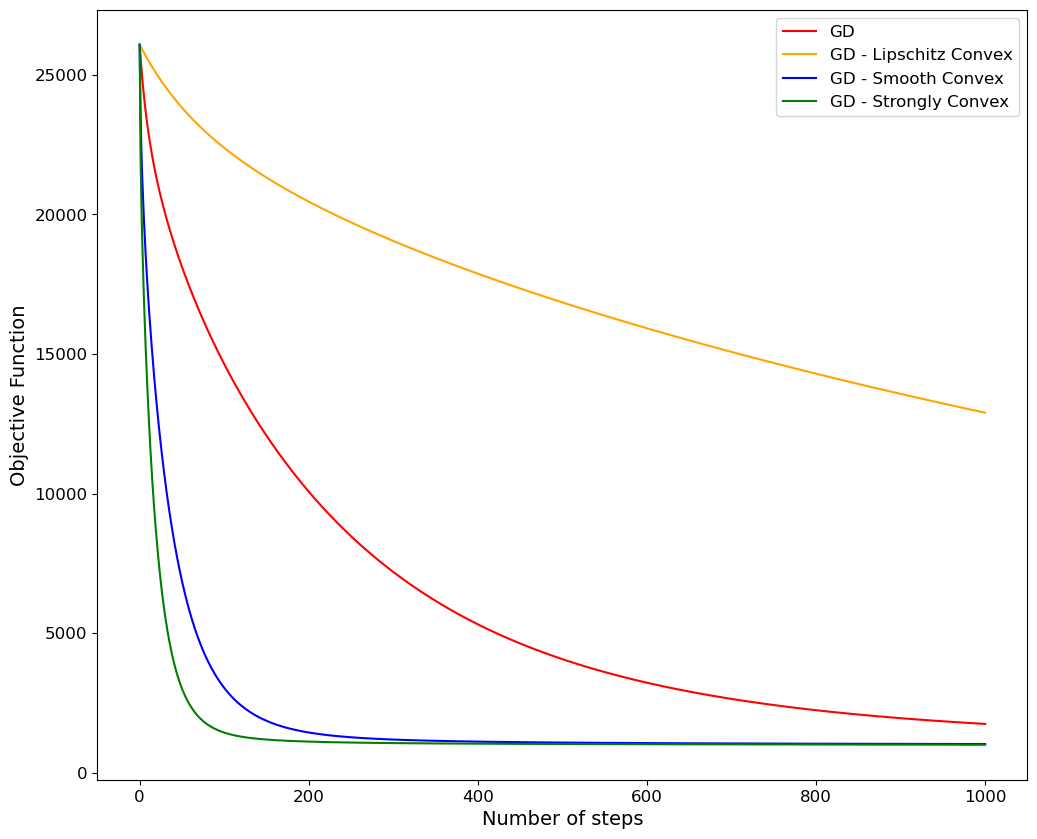

In [15]:
plt.figure(figsize=(12, 10))  
plt.xlabel('Number of steps', fontsize=14)
plt.ylabel('Objective Function', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.plot(range(len(f_gd)), f_gd, 'red', label='GD')
plt.plot(range(len(f_gd_L)), f_gd_L, 'orange', label='GD - Lipschitz Convex')
plt.plot(range(len(f_gd_S)), f_gd_S, 'blue', label='GD - Smooth Convex')
plt.plot(range(len(f_gd_SC)), f_gd_SC, 'green', label='GD - Strongly Convex')
plt.legend(loc='upper right', fontsize=12)
plt.show()


Supponiamo tutto smooth perchè migliore, non siamo riusciti a raggiungere comunque l'ottimo dopo 1000 iterazioni

---

**Forma penalizzata (Ridge Regression):**

$$
\min_{x} \; \mathcal{L}(x) = \|Xx - y\|^2 + \lambda \|x\|^2
$$

**Forma vincolata (equivalente con vincolo L2):**

$$
\min_{x} \; \|Xx - y\|^2 \quad \text{soggetto a} \quad \|x\|^2 \leq r
$$

In [16]:
def projection_l2_ball(x, radius=1.0):
    norm = np.linalg.norm(x)
    if norm > radius:
        return x / norm * radius
    else:
        return x

In [17]:
def projected_gradient_descent(
    x0,
    grad_func,
    loss_func,
    learning_rate,
    projection,
    max_iter,
    f_star=None,
    tol=1e-6,
    verbose=True
):
    
    x = x0.copy()
    x_vals = [x.copy()]            # Store iterates
    f_vals = [loss_func(x)]        # Store loss values
    
    for step in range(1, max_iter + 1):
        g = grad_func(x)               
        grad_norm = np.linalg.norm(g) 
        f_curr = loss_func(x)          
        
        if np.isnan(f_curr) or f_curr > 1e6:
            print("STOP - Divergence detected")
            break
        
        if verbose and f_star is not None:
            print_log(step, f_curr, f_star, grad_norm)
        
        if grad_norm < tol:
            break
        
        gamma = learning_rate(step)   
        x = x - gamma * g             
        
        x = projection(x)             # Project back to feasible set
        
        x_vals.append(x.copy())
        f_vals.append(loss_func(x))
    
    return f_vals, x_vals

In [18]:
def pgd_strongly_convex(x0, max_iter, X, y, radius):
    H = X.T @ X 
    L = np.linalg.norm(H, 2)
    return projected_gradient_descent(
        x0=x0,
        grad_func=lambda x: grad(x, X, y),
        loss_func=lambda x: loss(x, X, y),
        learning_rate=lambda k: 1.0 / L,
        projection=lambda x: projection_l2_ball(x, radius),
        max_iter=max_iter,
        f_star=f_opt
    )

In [19]:
print("[TRAIN] PGD Strongly Convex:")
f_pgd_SC, x_pgd_SC = pgd_strongly_convex(x0, max_iter=max_iter, X=X_train, y=y_train, radius=5.0)

x_final = x_pgd_SC[-1]
get_results(X_test, y_test, x_final, mu_y, std_y)

[TRAIN] PGD Strongly Convex:
[STEP    1] f(x) = 26080.00000 | f(x*) = 946.59249 | Δ = 2.51e+04 | ||grad|| = 2.10e+04
[STEP    2] f(x) = 22153.21812 | f(x*) = 946.59249 | Δ = 2.12e+04 | ||grad|| = 1.25e+04
[STEP    3] f(x) = 20430.16543 | f(x*) = 946.59249 | Δ = 1.95e+04 | ||grad|| = 1.05e+04
[STEP    4] f(x) = 19115.15890 | f(x*) = 946.59249 | Δ = 1.82e+04 | ||grad|| = 9.63e+03
[STEP    5] f(x) = 17998.51551 | f(x*) = 946.59249 | Δ = 1.71e+04 | ||grad|| = 9.03e+03
[STEP    6] f(x) = 17010.57355 | f(x*) = 946.59249 | Δ = 1.61e+04 | ||grad|| = 8.57e+03
[STEP    7] f(x) = 16116.83174 | f(x*) = 946.59249 | Δ = 1.52e+04 | ||grad|| = 8.20e+03
[STEP    8] f(x) = 15297.27269 | f(x*) = 946.59249 | Δ = 1.44e+04 | ||grad|| = 7.88e+03
[STEP    9] f(x) = 14539.09329 | f(x*) = 946.59249 | Δ = 1.36e+04 | ||grad|| = 7.60e+03
[STEP   10] f(x) = 13833.50210 | f(x*) = 946.59249 | Δ = 1.29e+04 | ||grad|| = 7.34e+03
[STEP   11] f(x) = 13174.11393 | f(x*) = 946.59249 | Δ = 1.22e+04 | ||grad|| = 7.11e+03
[ST

In [20]:
event_categories = sorted(set(event_name))
team_categories = sorted(set(team))
compound_categories = sorted(set(compound))
fresh_tyre_categories = sorted(set(fresh_tyre))
rainfall_categories = sorted(set(rainfall))

event_feature_names = [f"Event name [{cat}]" for cat in event_categories]
team_feature_names = [f"Team [{cat}]" for cat in team_categories]
compound_feature_names = [f"Compound [{cat}]" for cat in compound_categories]
fresh_tyre_feature_names = [f"Fresh tyre [{cat}]" for cat in fresh_tyre_categories]
rainfall_feature_names = [f"Rainfall [{cat}]" for cat in rainfall_categories]

num_feature_names = [
    "Tyre life",
    "Air temp",
    "Humidity",
    "Pressure",
    "Track temp",
    "Wind direction",
    "Wind speed",
    "Fuel level"
]

feature_names = (
    ["bias"] +
    event_feature_names +
    team_feature_names +
    compound_feature_names +
    fresh_tyre_feature_names +
    rainfall_feature_names +
    num_feature_names
)

coeff_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": x_final
})

def style_coeff(val, tol=1e-6):
    styles = []
    if abs(val) < tol:
        color = 'color: grey'
    else:
        color = 'color: green' if val > 0 else 'color: red'
    style = f'{color}; font-weight: bold'
    return style


row_styles = [
    {'selector': f'tbody tr:nth-child({i+1})', 'props': [('opacity', '0.4')]}
    for i, val in enumerate(coeff_df['Coefficient'])
    if abs(val) < 0.1
]

coeff_df_styled = (
    coeff_df.style
    .format({'Coefficient': '{:.3f}'})
    .map(style_coeff, subset=['Coefficient'])
    .set_table_styles(row_styles)
)

coeff_df_styled


,Feature,Coefficient
0,bias,0.241
1,Event name [Abu Dhabi Grand Prix],-0.110
2,Event name [Australian Grand Prix],-0.681
3,Event name [Austrian Grand Prix],-1.607
4,Event name [Azerbaijan Grand Prix],1.609
5,Event name [Bahrain Grand Prix],0.669
6,Event name [Belgian Grand Prix],2.129
7,Event name [British Grand Prix],0.342
8,Event name [Canadian Grand Prix],-1.001
9,Event name [Chinese Grand Prix],1.173


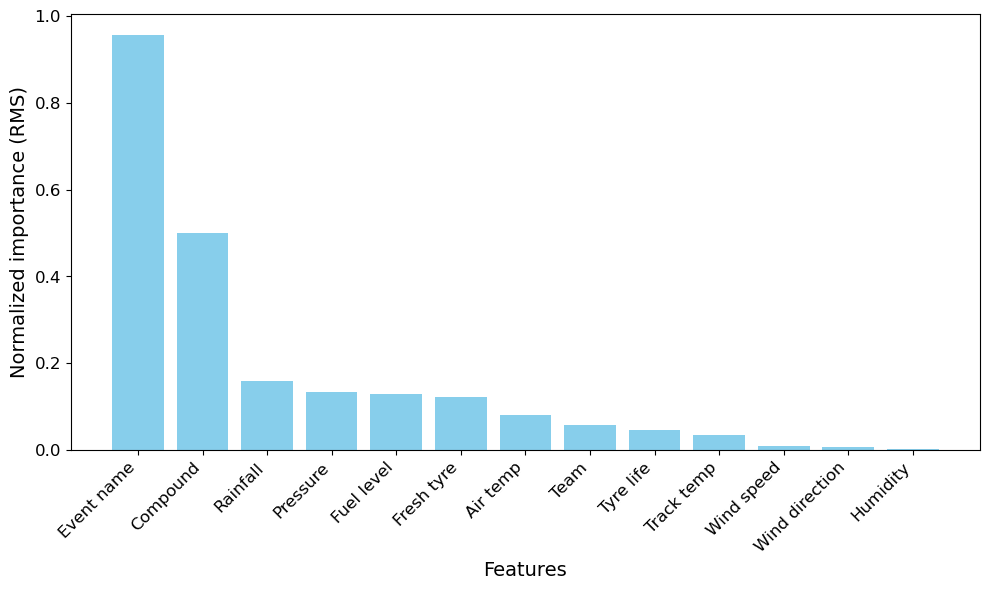

In [21]:
categorical_vars = {
    "Event name": event_feature_names,
    "Team": team_feature_names,
    "Compound": compound_feature_names,
    "Fresh tyre": fresh_tyre_feature_names,
    "Rainfall": rainfall_feature_names
}

numeric_feature_names = [
    "Tyre life",
    "Air temp",
    "Humidity",
    "Pressure",
    "Track temp",
    "Wind direction",
    "Wind speed",
    "Fuel level"
]

def plot_shrinkage(x_final): 

    coeff_df = pd.DataFrame({
        "Feature": feature_names,
        "Coefficient": x_final
    })

    # Exclude 'bias'
    coeff_df = coeff_df[coeff_df['Feature'] != 'bias']

    importance = {}

    # Categorical variables: RMS (root mean square) of dummy coefficients
    for var_name, dummy_features in categorical_vars.items():
        coeffs = coeff_df.loc[coeff_df['Feature'].isin(dummy_features), 'Coefficient'].values
        if len(coeffs) > 0:
            rms = np.sqrt(np.sum(coeffs**2) / len(coeffs))  # normalized L2
            importance[var_name] = rms
        else:
            importance[var_name] = 0

    # Numeric variables: absolute value of the single coefficient
    for num_var in numeric_feature_names:
        coeff = coeff_df.loc[coeff_df['Feature'] == num_var, 'Coefficient'].values
        if len(coeff) > 0:
            importance[num_var] = abs(coeff[0])
        else:
            importance[num_var] = 0

    # Sort by descending importance
    importance = dict(sorted(importance.items(), key=lambda item: item[1], reverse=True))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(importance.keys(), importance.values(), color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Normalized importance (RMS)', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tight_layout()
    plt.show()

plot_shrinkage(x_final)

---

## Lasso e Proximal Gradient Descent

La regressione **Lasso** minimizza la seguente funzione obiettivo:

$$
\min_{\beta} \left[ f(\beta) := \frac{1}{2} \|X\beta - y\|^2 + \lambda \|\beta\|_1 \right]
$$

Dove:

$$
\frac{1}{2} \|X\beta - y\|^2
$$  
è una funzione **differenziabile** (quadratica)

$$
\lambda \|\beta\|_1
$$  
è **non differenziabile** ma **convessa**


## Proximal Gradient Descent

Il **Proximal Gradient Descent** si applica a problemi del tipo:

$$
\min_\beta \left[ f(\beta) + g(\beta) \right]
$$

Dove:

$$
f(\beta)
$$  
è **differenziabile** con gradiente Lipschitz continuo

$$
g(\beta)
$$  
è **non differenziabile** ma ha un **operatore prossimale noto**


In [22]:
def loss_lasso(x, X, y, lam):
    return np.sum((X @ x - y) ** 2) + lam * np.linalg.norm(x, 1)

def soft_thresholding(x, thresh):
    return np.sign(x) * np.maximum(np.abs(x) - thresh, 0.0)

In [23]:
def proximal_gradient_descent(
    x0,
    grad_func,
    loss_func,
    prox_operator,
    learning_rate,
    lam,
    max_iter,
    f_star=None,
    tol=1e-6,
    verbose=True
):
    x = x0.copy()
    x_vals = [x.copy()]
    f_vals = [loss_func(x)]

    for step in range(1, max_iter + 1):
        g = grad_func(x)
        grad_norm = np.linalg.norm(g)
        f_curr = loss_func(x)

        if np.isnan(f_curr) or f_curr > 1e6:
            print("STOP - Divergence detected")
            break

        if verbose and f_star is not None:
            print_log(step, f_curr, f_star, grad_norm)

        if grad_norm < tol:
            break

        gamma = learning_rate(step)
        x = prox_operator(x - gamma * g, gamma * lam)

        x_vals.append(x.copy())
        f_vals.append(loss_func(x))

    return f_vals, x_vals


In [24]:
def pxgd_strongly_convex(x0, lam, max_iter, X, y):
    H = X.T @ X
    L = np.linalg.norm(H, 2)
    return proximal_gradient_descent(
        x0=x0,
        grad_func=lambda x: grad(x, X, y),
        loss_func=lambda x: loss_lasso(x, X, y, lam),
        prox_operator=soft_thresholding,
        learning_rate=lambda k: 1.0 / L,
        lam=lam,
        max_iter=max_iter,
        f_star=f_opt
    )

In [25]:
print("[TRAIN] PXGD Lasso Strongly Convex:")
f_pxgd_SC, x_pxgd_SC = pxgd_strongly_convex(
    x0, lam=500, max_iter=max_iter, X=X_train, y=y_train
)

x_final = x_pxgd_SC[-1]
get_results(X_test, y_test, x_final, mu_y, std_y)

[TRAIN] PXGD Lasso Strongly Convex:
[STEP    1] f(x) = 26080.00000 | f(x*) = 946.59249 | Δ = 2.51e+04 | ||grad|| = 2.10e+04
[STEP    2] f(x) = 22948.23157 | f(x*) = 946.59249 | Δ = 2.20e+04 | ||grad|| = 1.28e+04
[STEP    3] f(x) = 21741.47283 | f(x*) = 946.59249 | Δ = 2.08e+04 | ||grad|| = 1.10e+04
[STEP    4] f(x) = 20862.07281 | f(x*) = 946.59249 | Δ = 1.99e+04 | ||grad|| = 1.02e+04
[STEP    5] f(x) = 20124.16685 | f(x*) = 946.59249 | Δ = 1.92e+04 | ||grad|| = 9.60e+03
[STEP    6] f(x) = 19475.17640 | f(x*) = 946.59249 | Δ = 1.85e+04 | ||grad|| = 9.20e+03
[STEP    7] f(x) = 18890.67140 | f(x*) = 946.59249 | Δ = 1.79e+04 | ||grad|| = 8.87e+03
[STEP    8] f(x) = 18356.83688 | f(x*) = 946.59249 | Δ = 1.74e+04 | ||grad|| = 8.59e+03
[STEP    9] f(x) = 17864.39078 | f(x*) = 946.59249 | Δ = 1.69e+04 | ||grad|| = 8.34e+03
[STEP   10] f(x) = 17407.07591 | f(x*) = 946.59249 | Δ = 1.65e+04 | ||grad|| = 8.13e+03
[STEP   11] f(x) = 16980.42220 | f(x*) = 946.59249 | Δ = 1.60e+04 | ||grad|| = 7.93e

In [26]:
coeff_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": x_final
})

row_styles = [
    {'selector': f'tbody tr:nth-child({i+1})', 'props': [('opacity', '0.4')]}
    for i, val in enumerate(coeff_df['Coefficient'])
    if val == 0
]

coeff_df_styled = (
    coeff_df.style
    .format({'Coefficient': '{:.3f}'})
    .map(style_coeff, subset=['Coefficient'])
    .set_table_styles(row_styles)
)

coeff_df_styled

,Feature,Coefficient
0,bias,-0.000
1,Event name [Abu Dhabi Grand Prix],-0.000
2,Event name [Australian Grand Prix],-0.187
3,Event name [Austrian Grand Prix],-1.292
4,Event name [Azerbaijan Grand Prix],1.663
5,Event name [Bahrain Grand Prix],0.279
6,Event name [Belgian Grand Prix],2.068
7,Event name [British Grand Prix],0.093
8,Event name [Canadian Grand Prix],-0.539
9,Event name [Chinese Grand Prix],0.770


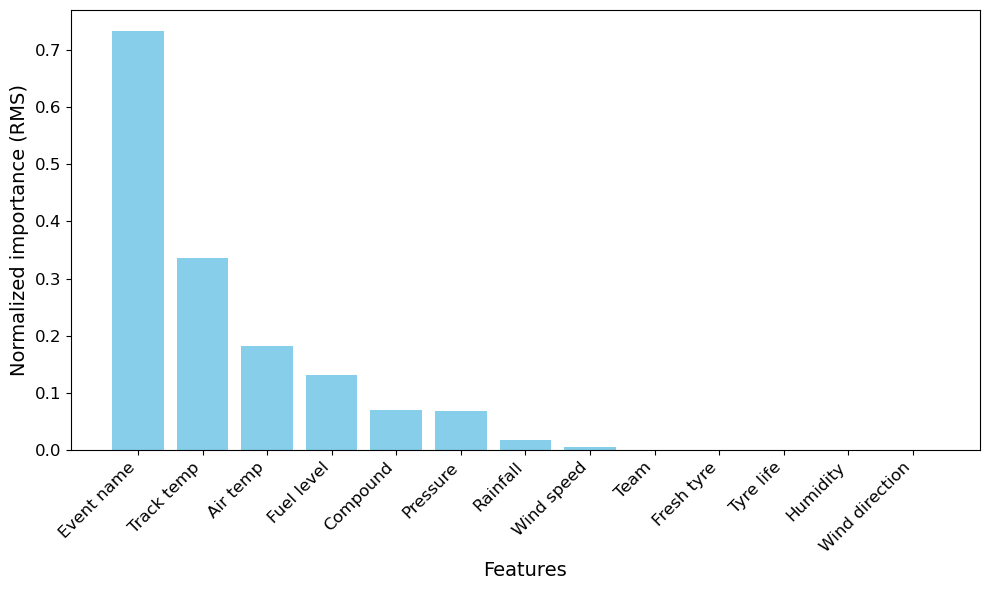

In [27]:
plot_shrinkage(x_final)

---